# Hands - On 4


## Importing all the neccessary libraries

In [137]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
# NBA season we will be analyzing

# URL page we will scraping (see image above)
url = "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

Here, the BeautifulSoup function passed through the entire web page in order to convert it into an object. Now we will trim the object to only include the table we need.

Let's extract the data of our interest from the webpage. See, how we are 

In [114]:
raw_data=[]
table=soup.find_all('table')
for row in table:
    line=row.text
    raw_data.append(line)
    
    
print(raw_data)

["\nPlayer Per Game Table\n\n\n\nRk\nPlayer\nPos\nAge\nTm\nG\nGS\nMP\nFG\nFGA\nFG%\n3P\n3PA\n3P%\n2P\n2PA\n2P%\neFG%\nFT\nFTA\nFT%\nORB\nDRB\nTRB\nAST\nSTL\nBLK\nTOV\nPF\nPTS\n\n\n1Precious AchiuwaC23TOR381123.33.98.1.4820.52.0.2603.46.1.557.5151.92.8.6892.04.66.61.00.60.71.22.110.2\n2Steven AdamsC29MEM424227.03.76.3.5970.00.0.0003.76.2.599.5971.13.1.3645.16.511.52.30.91.11.92.38.6\n3Bam AdebayoC25MIA575735.08.415.7.5360.00.2.0838.415.5.543.5374.45.5.8002.67.29.83.21.20.82.52.821.2\n4Ochai AgbajiSG22UTA39215.61.83.8.4830.92.3.3960.91.5.621.6040.40.6.6820.71.11.80.60.20.10.31.45.0\n5Santi AldamaPF22MEM561822.03.37.0.4741.43.7.3642.03.3.601.5711.41.9.7291.03.64.61.20.70.70.71.99.4\n6Nickeil Alexander-WalkerSG24TOT40314.52.34.9.4791.02.4.4121.32.4.546.5820.71.0.6750.31.41.72.00.60.41.21.56.3\n6Nickeil Alexander-WalkerSG24UTA36314.72.34.7.4881.02.4.4021.32.3.578.5910.81.1.6920.21.41.62.10.70.41.31.66.3\n6Nickeil Alexander-WalkerSG24MIN4013.02.56.0.4171.32.5.5001.33.5.357.5210.00.3.0000.51.

Define a list of columns and store the column names in the list

Extract one row from raw data at a time, make a dictionary (key-value pair) out of it, where the keys are the column names and values are the entries

Convert the data into a dataframe (which is kind of a table object) so that we could do some cleaning and apply additional transformation operations

In [115]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers



['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [116]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [117]:
df = pd.DataFrame(player_stats, columns = headers)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,38,11,23.3,3.9,8.1,.482,...,.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,.597,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,57,57,35.0,8.4,15.7,.536,...,.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22,UTA,39,2,15.6,1.8,3.8,.483,...,.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22,MEM,56,18,22.0,3.3,7.0,.474,...,.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4


### Saving the data into a csv file

In [118]:
df.to_csv("nba_data_processed.csv", index=False)

### Checking the null values

In [119]:
df.isnull().sum()

Player    25
Pos       25
Age       25
Tm        25
G         25
GS        25
MP        25
FG        25
FGA       25
FG%       25
3P        25
3PA       25
3P%       25
2P        25
2PA       25
2P%       25
eFG%      25
FT        25
FTA       25
FT%       25
ORB       25
DRB       25
TRB       25
AST       25
STL       25
BLK       25
TOV       25
PF        25
PTS       25
dtype: int64

Dropping the null values

In [122]:
import pandas as pd

df = pd.read_csv('nba_data_processed.csv', sep=',')
df.dropna(inplace=True)
print(df)

                 Player Pos   Age   Tm     G    GS    MP   FG   FGA    FG%  \
0      Precious Achiuwa   C  23.0  TOR  38.0  11.0  23.3  3.9   8.1  0.482   
1          Steven Adams   C  29.0  MEM  42.0  42.0  27.0  3.7   6.3  0.597   
2           Bam Adebayo   C  25.0  MIA  57.0  57.0  35.0  8.4  15.7  0.536   
3          Ochai Agbaji  SG  22.0  UTA  39.0   2.0  15.6  1.8   3.8  0.483   
4          Santi Aldama  PF  22.0  MEM  56.0  18.0  22.0  3.3   7.0  0.474   
..                  ...  ..   ...  ...   ...   ...   ...  ...   ...    ...   
643        Delon Wright  PG  30.0  WAS  31.0   3.0  22.6  2.5   5.3  0.467   
644  McKinley Wright IV  PG  24.0  DAL  20.0   1.0  10.3  1.2   2.5  0.469   
645      Thaddeus Young  PF  34.0  TOR  49.0   9.0  15.5  2.1   3.8  0.562   
646          Trae Young  PG  24.0  ATL  54.0  54.0  35.3  8.5  19.8  0.429   
648         Ivica Zubac   C  25.0  LAC  59.0  59.0  29.4  4.0   6.5  0.617   

     ...    FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS

In [125]:
df.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

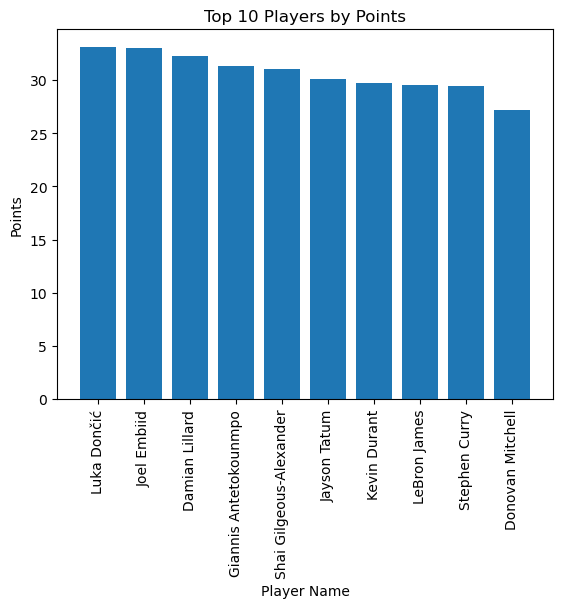

In [123]:
top10 = df.sort_values(by="PTS", ascending=False).head(10)
plt.bar(x=top10["Player"], height=top10["PTS"])
plt.xticks(rotation=90)
plt.xlabel("Player Name")
plt.ylabel("Points")
plt.title("Top 10 Players by Points")
plt.show()

It plots a bar chart of the top 10 players with the highest number of points using the bar() function of Matplotlib. The x-axis shows the player names, and the y-axis shows the number of points. The xticks() function is used to rotate the x-axis labels by 90 degrees to prevent overlapping. The plot has a descriptive title, axis labels, and no legend.

Text(0.5, 1.0, 'Assists-vs-Turnovers')

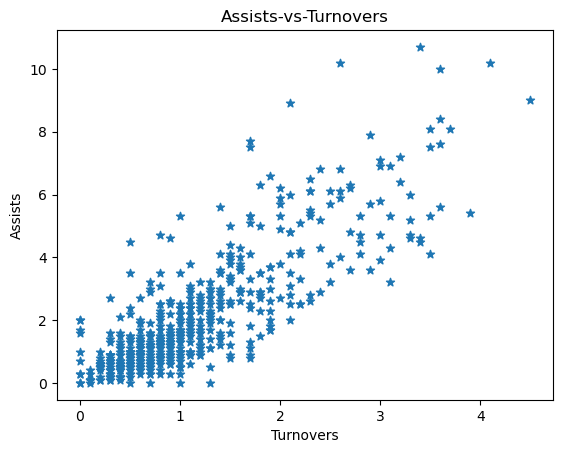

In [124]:
assists_column = df["AST"]
turnovers_column = df["TOV"]

plt.scatter(turnovers_column,assists_column, marker="*")

plt.xlabel("Turnovers")
plt.ylabel("Assists")

# We can add a title too
plt.title("Assists-vs-Turnovers")

Finally, it plots a scatter plot of Turnovers vs. Assists for all players in the dataset using the scatter() function of Matplotlib. The x-axis shows the Turnovers, and the y-axis shows the Assists. The plot has a descriptive title, axis labels, and no legend.

Text(0.5, 1.0, 'Minutes Per Game-vs-Field Goals Attempted')

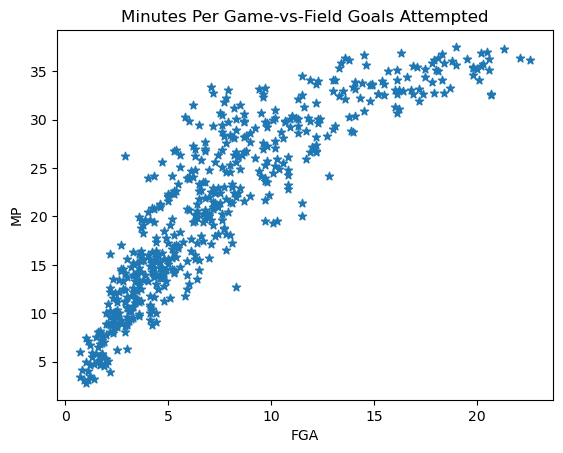

In [127]:
MP_column = df["MP"]
FGA_column = df["FGA"]

plt.scatter(FGA_column,MP_column, marker="*")

plt.xlabel("FGA")
plt.ylabel("MP")

# We can add a title too
plt.title("Minutes Per Game-vs-Field Goals Attempted")

Finally, it plots a scatter plot of Fieldgoals attempted vs. Minutes Played for all players in the dataset using the scatter() function of Matplotlib. The x-axis shows the FGA, and the y-axis shows the MP. The plot has a descriptive title, axis labels, and no legend.

Text(0.5, 0, 'Blocks per game')

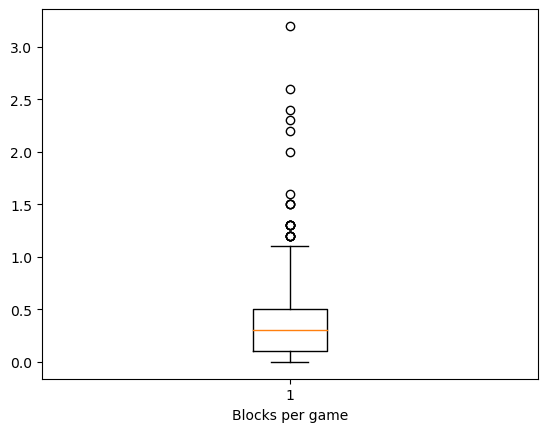

In [129]:
BLK_column = df["BLK"]

plt.boxplot(BLK_column)

plt.xlabel("Blocks per game")


A box plot of the "blocks" column in a dataset would show the distribution of block statistics across the players or teams in the dataset. Specifically, the box plot would display the median block value (the line in the middle of the box), the range of block values from the first quartile (the bottom of the box) to the third quartile (the top of the box), and any outliers (represented as individual points or circles outside the box). The box plot can provide insight into the spread and central tendency of the block values, as well as identify any unusual values that may warrant further investigation.

Text(0.5, 1.0, 'Positions v Points')

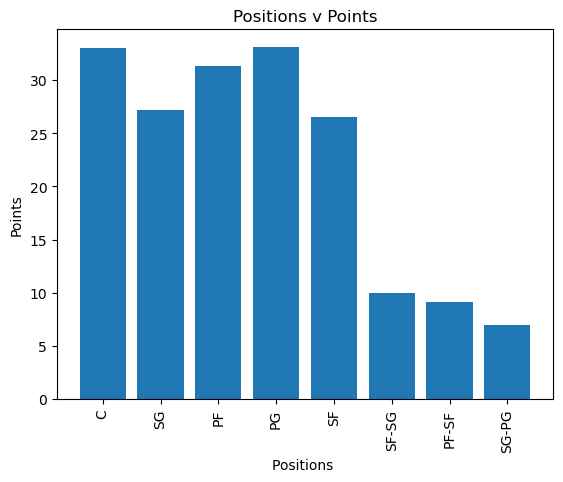

In [138]:


# Now plot our bar grahp
plt.bar(x=df['Pos'], height=df['PTS'])

# Now add axis labels with units
plt.xticks(rotation=90)
plt.xlabel("Positions ")
plt.ylabel("Points")

# We can add a title too
plt.title("Positions v Points")

It plots a bar chart of the top 10 positions with the highest number of points using the bar() function of Matplotlib. The x-axis shows the position names, and the y-axis shows the number of points. The xticks() function is used to rotate the x-axis labels by 90 degrees to prevent overlapping. The plot has a descriptive title, axis labels, and no legend.